<a href="https://colab.research.google.com/github/Paritosh025/text-sentiment-neural-network/blob/main/Amazon_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataframe = pd.read_csv("/content/drive/MyDrive/Review3/1429_1.csv",usecols=['id','reviews.rating', 'reviews.text'], encoding = 'utf8')
dataframe.head()

,id,reviews.rating,reviews.text
0,AVqkIhwDv8e3D1O-lebb,5.0,This product so far has not disappointed. My c...
1,AVqkIhwDv8e3D1O-lebb,5.0,great for beginner or experienced person. Boug...
2,AVqkIhwDv8e3D1O-lebb,5.0,Inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,4.0,I've had my Fire HD 8 two weeks now and I love...
4,AVqkIhwDv8e3D1O-lebb,5.0,I bought this for my grand daughter when she c...


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              34660 non-null  object 
 1   reviews.rating  34660 non-null  float64
 2   reviews.text    34660 non-null  object 
 3   sentiment       34660 non-null  int64  
 4   random_number   34660 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe.isnull().sum()

id                 0
reviews.rating    33
reviews.text       1
dtype: int64

In [ ]:
dataframe = dataframe.fillna(method = "ffill",axis = 0)

In [ ]:
dataframe.isnull().sum()

id                0
reviews.rating    0
reviews.text      0
dtype: int64

In [ ]:
import re
import string
def cleanstr(text):
    text= str(text).lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords = set(stopwords.words('english'))
stopwords.remove('not')
def remove_stopwords(text):
  token = word_tokenize(text)
  token_without_stopwords = []
  for words in token:
    if words not in stopwords:
      token_without_stopwords.append(words)
  
  text = " ".join(token_without_stopwords)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer  = WordNetLemmatizer()
def lemmatize(text):
  token = word_tokenize(text)
  word_pos_tags = nltk.pos_tag(token)
  token_with_lemmatizer = []
  for idx, tag in enumerate(word_pos_tags):
    token_with_lemmatizer.append(lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])))
  
  text = " ".join(token_with_lemmatizer)
  return text


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

# def polarity(text):
#   sia= SentimentIntensityAnalyzer()
#   dic = sia.polarity_scores(text)
#   return dic.get('compound')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sentiment = {
            1: -1,
            2: -1,
            3: 0,
            4: 1,
            5: 1
            }

In [ ]:
dataframe['sentiment'] = dataframe['reviews.rating'].map(sentiment)

In [ ]:
dataframe['reviews.text'] = dataframe['reviews.text'].apply(cleanstr)
dataframe['reviews.text'] = dataframe['reviews.text'].apply(remove_stopwords)
dataframe['reviews.text'] = dataframe['reviews.text'].apply(lemmatize)
dataframe.head()

,id,reviews.rating,reviews.text,sentiment
0,AVqkIhwDv8e3D1O-lebb,5.0,product far not disappointed child love use li...,1
1,AVqkIhwDv8e3D1O-lebb,5.0,great beginner experience person buy gift love,1
2,AVqkIhwDv8e3D1O-lebb,5.0,inexpensive tablet use learn step nabi thrill ...,1
3,AVqkIhwDv8e3D1O-lebb,4.0,fire hd two week love tablet great value prime...,1
4,AVqkIhwDv8e3D1O-lebb,5.0,buy grand daughter come visit set user enter a...,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              34660 non-null  object 
 1   reviews.rating  34660 non-null  float64
 2   reviews.text    34660 non-null  object 
 3   sentiment       34660 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
dataframe.head()

,id,reviews.rating,reviews.text,sentiment
0,AVqkIhwDv8e3D1O-lebb,5.0,product far not disappointed child love use li...,1
1,AVqkIhwDv8e3D1O-lebb,5.0,great beginner experience person buy gift love,1
2,AVqkIhwDv8e3D1O-lebb,5.0,inexpensive tablet use learn step nabi thrill ...,1
3,AVqkIhwDv8e3D1O-lebb,4.0,fire hd two week love tablet great value prime...,1
4,AVqkIhwDv8e3D1O-lebb,5.0,buy grand daughter come visit set user enter a...,1


In [ ]:
dataframe['sentiment'].describe()

count    34660.000000
mean         0.909896
std          0.358949
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64

# Model Implementation 

In [ ]:
import numpy as np
index = dataframe.index
dataframe['random_number'] = np.random.randn(len(index))
train = dataframe[dataframe['random_number'] <= 0.8]
test = dataframe[dataframe['random_number'] > 0.8]

In [ ]:
# train.head()
Y_train = train['sentiment']
Y_test = test['sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [ ]:
cv = CountVectorizer()
X_train  = cv.fit_transform(train['reviews.text'])
X_test = cv.transform(test['reviews.text'])

In [ ]:
X_train =  X_train.toarray()
X_test = X_test.toarray()

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = X_train.shape[1])) 
model.add(Dense(units = 8, activation = 'relu' ))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
852/852 [==============================] - 9s 10ms/step - loss: 0.2773 - accuracy: 0.9308
Epoch 2/10
852/852 [==============================] - 9s 11ms/step - loss: 0.1953 - accuracy: 0.9240
Epoch 3/10
852/852 [==============================] - 8s 10ms/step - loss: 0.1625 - accuracy: 0.9219
Epoch 4/10
852/852 [==============================] - 8s 10ms/step - loss: 0.1141 - accuracy: 0.9243
Epoch 5/10
852/852 [==============================] - 12s 14ms/step - loss: 0.0430 - accuracy: 0.9222
Epoch 6/10
852/852 [==============================] - 8s 10ms/step - loss: -0.0605 - accuracy: 0.9233
Epoch 7/10
852/852 [==============================] - 8s 9ms/step - loss: -0.2061 - accuracy: 0.9239
Epoch 8/10
852/852 [==============================] - 8s 9ms/step - loss: -0.4338 - accuracy: 0.9254
Epoch 9/10
852/852 [==============================] - 8s 10ms/step - loss: -0.7543 - accuracy: 0.9243
Epoch 10/10
852/852 [==============================] - 8s 9ms/step - loss: -1.1904 - acc

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                161664    
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161,809
Trainable params: 161,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc  = model.evaluate(X_test,Y_test)

232/232 [==============================] - 1s 5ms/step - loss: 0.0402 - accuracy: 0.9083


In [ ]:
print(test_loss)
print(test_acc)

0.040189553052186966
0.9082581400871277


# Model Deployment


In [ ]:
text='''product is working'''

text=cleanstr(text)
text=remove_stopwords(text)
text=(lemmatize(text))
print(text)

product work


In [ ]:
vec=cv.transform([text])
vec = vec.toarray()
print(vec)

pre= model.predict(vec)
print(pre)
if pre<=0.45:
    print("Negative")
elif pre<=0.85:
    print("Neutral")
else:
    print("Positive")

[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 0s 101ms/step
[[0.46383294]]
Neutral


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Review3/model_save.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/Review3/model_save.hdf5')

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Review3/Amazon-reivew-export.csv', usecols = ['reviews.rating','reviews.text'], encoding = 'utf8')
dataset.head()

,reviews.rating,reviews.text
0,5,It's a pet peeve of mine (no pun intended) tha...
1,5,The biggest feature I needed out of this buckl...
2,5,My 40 pound pup likes to stand half on the cen...
3,4,I have a 60 lb lab/husky mix and she loves to ...
4,4,"These belts are great for cars, but because th..."


In [ ]:
dataset['reviews.text'] = dataset['reviews.text'].apply(cleanstr)
dataset['reviews.text'] = dataset['reviews.text'].apply(remove_stopwords)
dataset['reviews.text'] = dataset['reviews.text'].apply(lemmatize)
dataset.head()

,reviews.rating,reviews.text
0,5,pet peeve mine pun intend not awareness import...
1,5,big feature need buckle fit mazda cx dog prett...
2,5,pound pup like stand half center console half ...
3,4,lb lab husky mix love stick head window car us...
4,4,belt great car short even adjust long length s...


In [ ]:
dataset = dataset.fillna(method = "ffill",axis = 0)

In [ ]:
test = cv.transform(dataset['reviews.text'])

In [ ]:
test = test.toarray()

In [ ]:
dataset['result'] = loaded_model.predict(test)

15/15 [==============================] - 0s 7ms/step


In [ ]:
dataset.head()

,reviews.rating,reviews.text,result
0,5,pet peeve mine pun intend not awareness import...,0.996905
1,5,big feature need buckle fit mazda cx dog prett...,0.989674
2,5,pound pup like stand half center console half ...,0.994995
3,4,lb lab husky mix love stick head window car us...,0.993547
4,4,belt great car short even adjust long length s...,0.986828


In [ ]:
def findout(data):
  if data < 0.45:
    return -1
  elif data > 0.85:
    return 1
  else:
    return 0

In [ ]:
dataset['reviews.sentiment'] = dataset['result'].apply(findout)

In [ ]:
dataset.head(10)

,reviews.rating,reviews.text,result,reviews.sentiment
0,5,pet peeve mine pun intend not awareness import...,0.996905,1
1,5,big feature need buckle fit mazda cx dog prett...,0.989674,1
2,5,pound pup like stand half center console half ...,0.994995,1
3,4,lb lab husky mix love stick head window car us...,0.993547,1
4,4,belt great car short even adjust long length s...,0.986828,1
5,5,work great except definitely need cover seat b...,0.988745,1
6,5,sturdy seatbelt keep pet secure water dish lig...,0.991865,1
7,5,order go long road trip get think long enough ...,0.996261,1
8,5,great use car adapt carabiner stroller well bu...,0.992709,1
9,5,fur baby must keep safe form sudden stop turn ...,0.991499,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


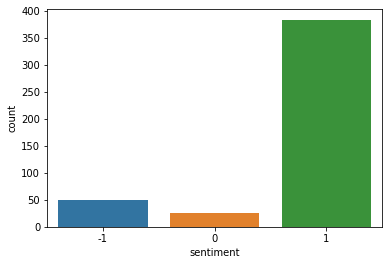

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(dataset['reviews.sentiment'])
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews.rating     28332 non-null  int64  
 1   reviews.text       28332 non-null  object 
 2   result             28332 non-null  float32
 3   reviews.sentiment  28332 non-null  int64  
dtypes: float32(1), int64(2), object(1)
memory usage: 774.8+ KB


In [ ]:
dataset['reviews.sentiment'].value_counts()

 1    23632
-1     2760
 0     1940
Name: reviews.sentiment, dtype: int64

In [ ]:
dataset.describe()

,reviews.rating,result,reviews.sentiment
count,28332.000000,28332.000000,28332.000000
mean,4.514048,0.864250,0.736693
std,0.934957,0.278015,0.623556
min,1.000000,0.000000,-1.000000
25%,4.000000,0.942828,1.000000
50%,5.000000,0.974162,1.000000
75%,5.000000,0.983283,1.000000
max,5.000000,1.000000,1.000000


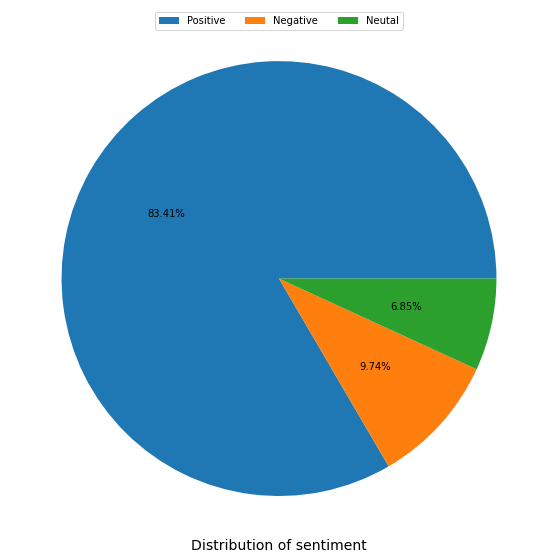

In [ ]:
plt.figure(figsize = (10, 10))
label=["Positive","Negative","Neutal"]
plt.pie(dataset['reviews.sentiment'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.show()